# Padded Graph Matching
Consider the scenario where one would like to match graphs $A$ and $B$ with $n_1$ and $n_2$ nodes, respectively, where 
$n_1 < n_2$. The most straightforward fashion to 'pad' $A$, such that $A$ and $B$ have the same shape, is to add $n_2 - n_1$ isolated nodes to $A$ (represented as empty row/columns in the adjacency matrix). This padding scheme is known as $\textit{naive padding}$, substituting $A \oplus 0_{(n_2-n_1)x(n_2-n_1)}$ and $B$ in place of $A$ and $B$, respectively.

The effect of this is that one matches $A$ to the best subgraph of $B$. That is, the isolated vertices added to $A$ through padding have an affinity to the low-density subgraphs of $B$, in effect giving the isolates a false signal.  

Instead, we may desire to match $A$ to the best fitting induced subgraph of $B$. This padding scheme is known as $\textit{adopted padding}$, and is achieved by substituting $\tilde{A} \oplus 0_{(n_2-n_1)x(n_2-n_1)}$ and $\tilde{B}$ in place of $A$ and $B$, respectively, where $\tilde{A} = 2A - 1_{n_1}1_{n_1}^T$ and $\tilde{B} = 2B - 1_{n_2}1_{n_2}^T$.


To demonstrate the difference between the two padding schemes, we sample two graph's $G_1$ and $G_2'$, each having 400 vertices, from a $0.5 \sim SBM(4,b,\Lambda)$, where b assigns 100 vertices to each of the k = 4 blocks, and

\begin{align*}
\Lambda &= \begin{bmatrix} 
0.9 & 0.4 & 0.3 & 0.2\\
0.4 & 0.9 & 0.4 & 0.3\\
0.3 & 0.4 & 0.9 & 0.4\\
0.2 & 0.3 & 0.4 & 0.7
\end{bmatrix}\\
\end{align*}

We create $G_2$ from $G_2'$ by removing 25 nodes from each block of $G_2'$, yielding a 300 node graph (example adapted from section 2.5 of [1]).

The goal of the matching in this case is to recover $G_2$ by matching the right most figure below and $G_1$. That is, we seek to recover the shared community structure common between two graphs of differing shapes.

<a id="1">[1]</a> 
D. Fishkind, S. Adali, H. Patsolic, L. Meng, D. Singh, V. Lyzinski, C. Priebe,
        "Seeded graph matching", Pattern Recognit. 87 (2019) 203–215

## SBM correlated graph pairs

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packag

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/runner/work/graspologic/graspologic/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap)


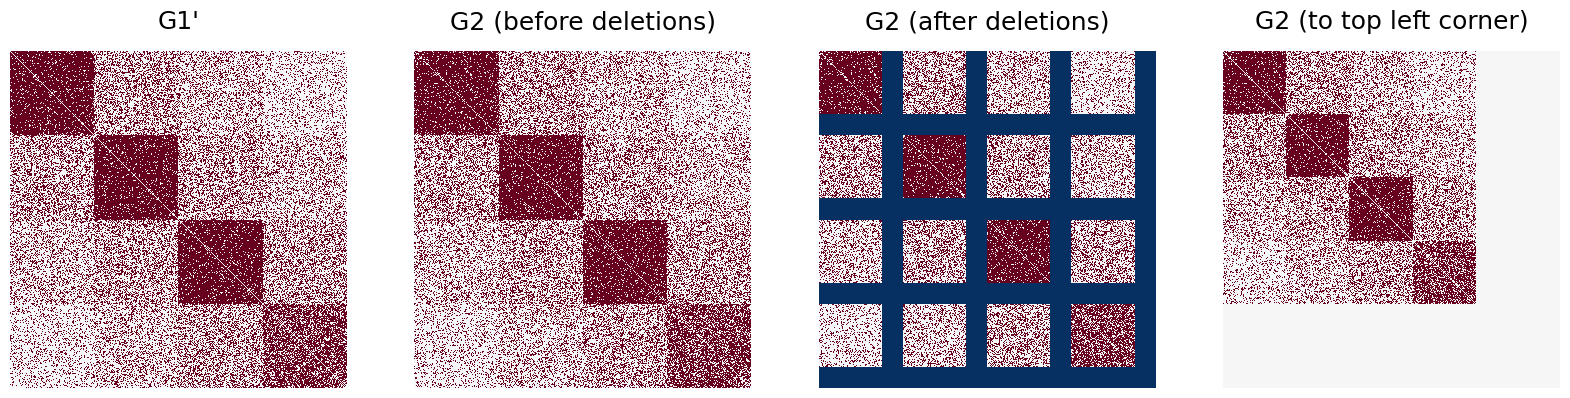

In [1]:
# simulating G1', G2, deleting 25 vertices
import numpy as np
import matplotlib.pyplot as plt
from graspologic.match import graph_match
from graspologic.simulations import sbm_corr
from graspologic.plot import heatmap

np.random.seed(1)
rng = np.random.default_rng(1)

directed = False
loops = False
block_probs = [
    [0.9, 0.4, 0.3, 0.2],
    [0.4, 0.9, 0.4, 0.3],
    [0.3, 0.4, 0.9, 0.4],
    [0.2, 0.3, 0.4, 0.7],
]
n = 100
n_blocks = 4
rho = 0.5
block_members = np.array(n_blocks * [n])
n_verts = block_members.sum()
G1, G2_full = sbm_corr(block_members, block_probs, rho, directed, loops)

keep_indices = np.concatenate(
    (np.arange(75), np.arange(100, 175), np.arange(200, 275), np.arange(300, 375))
)

G2 = G2_full[keep_indices][:, keep_indices]

G2_deleted = np.full((G1.shape), -1)
G2_deleted[np.ix_(keep_indices, keep_indices)] = G2

topleft_G2 = np.zeros((400, 400))
topleft_G2[:300, :300] = G2
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
heatmap(G1, ax=axs[0], cbar=False, title="G1'")
heatmap(G2_full, ax=axs[1], cbar=False, title="G2 (before deletions)")
heatmap(G2_deleted, ax=axs[2], cbar=False, title="G2 (after deletions)")
_ = heatmap(topleft_G2, ax=axs[3], cbar=False, title="G2 (to top left corner)")

## Naive vs Adopted Padding

Matching accuracy with naive padding: 0.01
Matching accuracy with adopted padding: 1.00


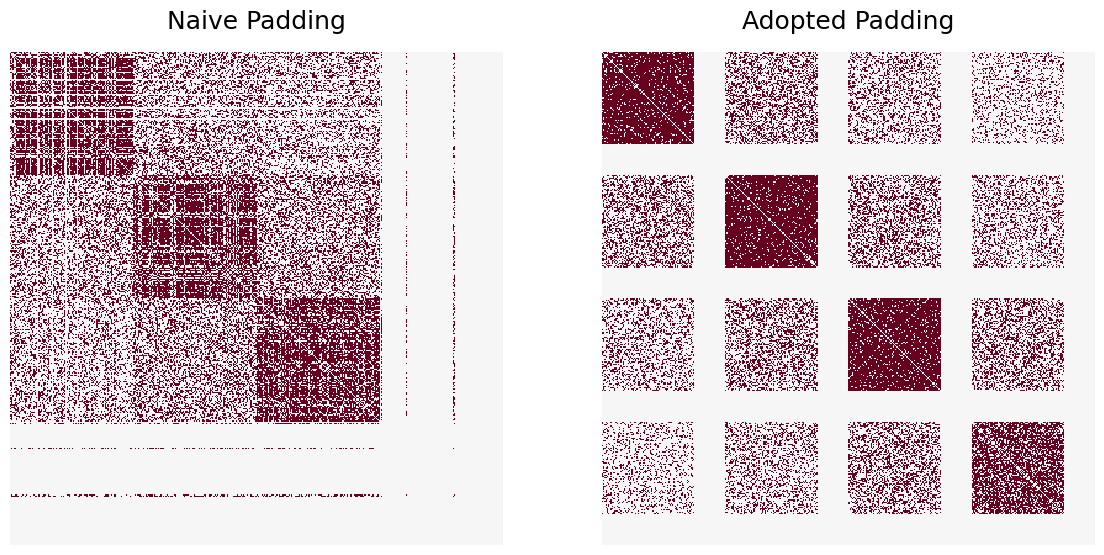

In [2]:
seed2 = rng.choice(np.arange(G2.shape[0]), 8)
seed1 = [int(x / 75) * 25 + x for x in seed2]

partial_match = np.column_stack((seed1, seed2))

naive_indices1, naive_indices2, _, _ = graph_match(
    G1, G2, partial_match=partial_match, padding="naive", rng=rng
)
G2_naive = G2[naive_indices2][:, naive_indices2]
G2_naive_full = np.zeros(G1.shape)
G2_naive_full[np.ix_(naive_indices1, naive_indices1)] = G2_naive

adopted_indices1, adopted_indices2, _, _ = graph_match(
    G1, G2, partial_match=partial_match, padding="adopted", rng=rng
)
G2_adopted = G2[adopted_indices2][:, adopted_indices2]
G2_adopted_full = np.zeros(G1.shape)
G2_adopted_full[np.ix_(adopted_indices1, adopted_indices1)] = G2_adopted

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
heatmap(G2_naive_full, ax=axs[0], cbar=False, title="Naive Padding")
heatmap(G2_adopted_full, ax=axs[1], cbar=False, title="Adopted Padding")


def compute_match_ratio(indices1, indices2):
    match_ratio = 0
    for i in range(len(indices2)):
        if (indices1[i] == keep_indices[i]) and (indices2[i] == i):
            match_ratio += 1
    return match_ratio / len(indices2)

print(f"Matching accuracy with naive padding: {compute_match_ratio(naive_indices1, naive_indices2):.2f}")
print(f"Matching accuracy with adopted padding: {compute_match_ratio(adopted_indices1, adopted_indices2):.2f}")


We observe that the two padding schemes perform as expected. The naive scheme permutes $G_2$ such that it matches a subgraph of $G_1$, specifically the subgraph of the first three blocks. Additionally, (almost) all isolated vertices of $G_2$ are permuted to the fourth block of $G_1$.

On the other hand, we see that adopted padding preserves the common block structure between $G_1$ and $G_2$.